### TITLE : Application of Support Vector Machine (SVM) in Classification of Breast Cancer 

### COURSE : Software lab (CSC 320)
    


### BY :  
 Adesina Yinka Abeeb (CSC/2017/1026) 





Adio Opeyemi Rukayat (CSC/2017/1032)

Adeyanju Paul Toluwani (CSC/2017/1029

### SUBMITTED TO:
    
    


Mr. John

### UNDER THE GUIDANCE OF :               



Mr. John

### DATE : 

June, 2021

# TABLE OF CONTENTS

#### - Introduction
#### - Statement of the problem
#### - Algorithm
#### - Implementation
#### - User Guide
#### - Reference

# INTRODUCTION



Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. Compared to newer algorithms like neural networks, they have two main advantages: "higher speed" and "better performance with a limited number of samples" (in the thousands). This makes the algorithm very suitable for classification problems, where it’s common to have access to a dataset of at most a couple of thousands of tagged samples.
In regard to the explanation above, We'd show the application of Support Vector Machine (SVM) algorithm in Classification of Breast Cancer

# STATEMENT OF THE PROBLEM

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
Early diagnosis significantly increases the chances of survival. The key challenges against it’s detection is how to classify tumors into MALIGNANT (cancerous) or BENIGN(non cancerous). A tumor is considered MALIGNANT if the cells can grow into surrounding tissues or spread to distant areas of the body. A BENIGN tumor does not invade nearby tissue nor spread to other parts of the body the way cancerous tumors can. But benign tumors can be serious if they press on vital structures such as blood vessels or nerves.
Machine Learning technique can dramatically improve the level of diagnosis in breast cancer. Research shows that experienced physicians can detect cancer by 79% accuracy, while a 91 %( sometimes up to 97%) accuracy can be achieved using a Machine Learning technique like Support Vector Machine (SVM)

# IMPLEMENTATION

In [3]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#The dataset was gotten from "Kaggle.com", it's a random dataset which contains test results of different patients
# who went for cancer diagnosis
data = pd.read_csv(r"C:\Users\King alagbe\Videos\Breast Cancer Prediction.csv")

In [5]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
X = data.drop(["Class", "Sample code number"], axis = 1)
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [9]:
# Taken "Class" as the Target
y = data["Class"]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [10]:
# split the dataset into Training data and testing data
# the trained data would be tested on the test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 20, stratify = y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((546, 9), (546,), (137, 9), (137,))

In [11]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf', C =10 , gamma = 0.1)

In [12]:
# train the data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Confusion matrix:
 [[85  4]
 [ 0 48]]


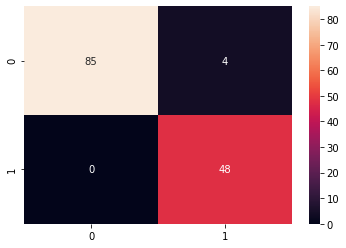

In [13]:
# Check how well the model Classified the data
from sklearn.metrics import classification_report , confusion_matrix
cm = np.array(confusion_matrix(y_test, y_pred))
print("Confusion matrix:\n" , cm)
sns.heatmap(cm, annot =True)

In [14]:
# Generate results of metrics to check how well the the trained model performed
cr = classification_report(y_test, y_pred)
print("Classification report : \n" , cr)

Classification report : 
               precision    recall  f1-score   support

           2       1.00      0.96      0.98        89
           4       0.92      1.00      0.96        48

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In [15]:
# check accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy score for the model is:" , accuracy_score(y_test, y_pred)* 100 , "%")

Accuracy score for the model is: 97.08029197080292 %


#### It gave a nice accuracy score, which means our data which was trained on Support Vector Machine (SVM) gave a surety of 97% on an unknown test data. This would surely go a long way in this new age and it'd also help out the physicians in detecting cancers (with a high accuracy).

# REFERENCE

https://towardsdatascience.com/breast-cancer-classification-using-support-vector-machine-svm-a510907d4878

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,than%20the%20number%20of%20samples.